In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder

In [4]:
# CSV 파일 불러오기
df = pd.read_csv("/content/sample_data/diabetes.csv", index_col=0)
df


,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,,,,,,,,
6,148,72,35,0,33.6,0.627,50,1
1,85,66,29,0,26.6,0.351,31,0
8,183,64,0,0,23.3,0.672,32,1
1,89,66,23,94,28.1,0.167,21,0
0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...
10,101,76,48,180,32.9,0.171,63,0
2,122,70,27,0,36.8,0.340,27,0
5,121,72,23,112,26.2,0.245,30,0


In [5]:
print("결측치 확인:\n", df.isnull().sum())

결측치 확인:
 Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


data SHAPE : 

(614, 7) (614, 2)
(154, 7) (154, 2)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_24 (Dense)                     │ (None, 64)                  │             512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_25 (Dense)                     │ (None, 16)                  │           1,040 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_26 (Dense)                     │ (None, 8)                   │             136 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_27 (Dense)                     │ (None, 2)                   │              18 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,706 (6.66 KB)

 Trainable params: 1,706 (6.66 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/25
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - accuracy: 0.3716 - loss: 5.8977 - val_accuracy: 0.6234 - val_loss: 1.1461
Epoch 2/25
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5259 - loss: 1.2797 - val_accuracy: 0.6494 - val_loss: 0.7061
Epoch 3/25
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6485 - loss: 0.6926 - val_accuracy: 0.6299 - val_loss: 0.6554
Epoch 4/25
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6666 - loss: 0.6478 - val_accuracy: 0.6558 - val_loss: 0.6454
Epoch 5/25
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6705 - loss: 0.6282 - val_accuracy: 0.6818 - val_loss: 0.6308
Epoch 6/25
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6751 - loss: 0.6318 - val_accuracy: 0.6948 - val_loss: 0.6251
Epoch 7/25
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6752 - loss: 0.6145 - val_accuracy: 0.6948 - val_loss: 0.6233
Epoch 8/25
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6748 - loss: 0.6252 - val_accuracy: 0.6623 - val_loss

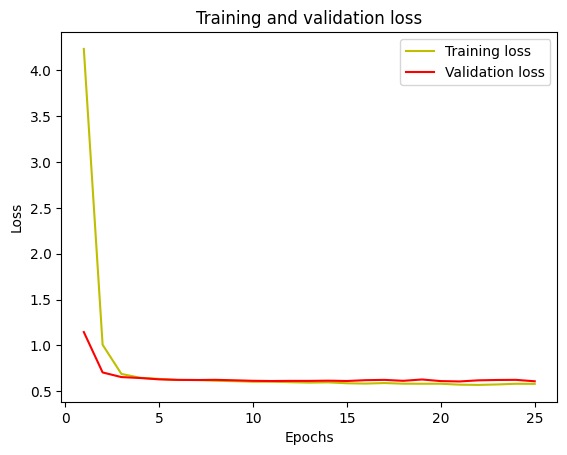

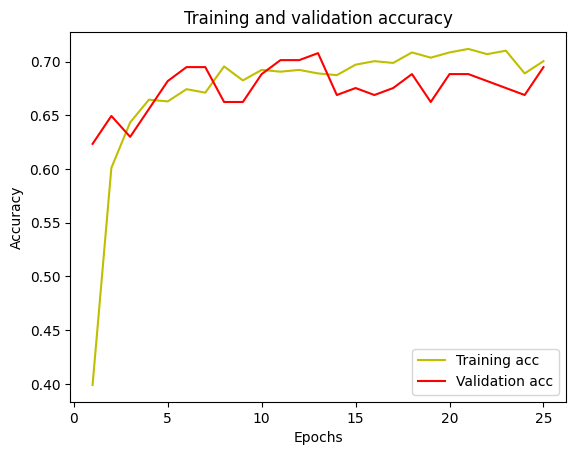

              precision    recall  f1-score   support

           0       0.70      0.91      0.79        99
           1       0.65      0.31      0.42        55

    accuracy                           0.69       154
   macro avg       0.68      0.61      0.61       154
weighted avg       0.69      0.69      0.66       154

[[90  9]
 [38 17]]


In [12]:
# 1. 데이터 전처리 (X: 특성, y: 타겟)
X = df.drop('Outcome', axis=1)
y = df["Outcome"]

# 2. One-hot Encoding
X = X.values
Y = pd.get_dummies(y).values

# 3. 데이터 분할 (훈련 80%, 테스트 20%)
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
print("data SHAPE : \n")
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

import tensorflow as tf
from tensorflow import keras

# 4. Defining the model
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD, Adam

model = Sequential()
model.add(Dense(64,input_shape=(7,),activation='relu'))  # 입력층 및 첫 번째 은닉층 (출력 뉴런 64개)
model.add(Dense(16,activation='relu'))  # 두 번째 은닉층 (출력 뉴런 32개)
model.add(Dense(8,activation='relu'))
model.add(Dense(2,activation='sigmoid'))  # 출력층 (출력 뉴런 10개, 이진 분류 → sigmoid /다중 분류 → softmax)
model.compile(Adam(learning_rate=0.001),'binary_crossentropy',metrics=['accuracy'])
model.summary()

# 5. Fitting
model_history=model.fit(x=X_train, y=y_train, epochs=25, batch_size=32,validation_data= (X_test,y_test))
y_pred = model.predict(X_test)

y_test_class = np.argmax(y_test,axis=1)
y_pred_class = np.argmax(y_pred,axis=1)

# 6. Training and validation Loss/ Accuracy
import matplotlib.pyplot as plt
import seaborn as sns

loss =model_history.history['loss']
val_loss =model_history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

acc =model_history.history['accuracy']
val_acc =model_history.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# 7. Accuracy of the predicted values
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test_class,y_pred_class))
print(confusion_matrix(y_test_class,y_pred_class))

data SHAPE :
(614, 6) (614, 248)
(154, 6) (154, 248)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_32 (Dense)                     │ (None, 64)                  │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_33 (Dense)                     │ (None, 16)                  │           1,040 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_34 (Dense)                     │ (None, 8)                   │             136 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_35 (Dense)                     │ (None, 1)                   │               9 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,633 (6.38 KB)

 Trainable params: 1,633 (6.38 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/25
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 22.6219 - mse: 22.6219 - val_loss: 1.5790 - val_mse: 1.5790
Epoch 2/25
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.9296 - mse: 0.9296 - val_loss: 0.8826 - val_mse: 0.8826
Epoch 3/25
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.7214 - mse: 0.7214 - val_loss: 0.5708 - val_mse: 0.5708
Epoch 4/25
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.5104 - mse: 0.5104 - val_loss: 0.2079 - val_mse: 0.2079
Epoch 5/25
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.3616 - mse: 0.3616 - val_loss: 0.1518 - val_mse: 0.1518
Epoch 6/25
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.2844 - mse: 0.2844 - val_loss: 0.0973 - val_mse: 0.0973
Epoch 7/25
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.1607 - mse: 0.1607 - val_loss: 0.9294 - val_mse: 0.9294
Epoch 8/25
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.1935 - mse: 0.1935 - val_loss: 0.1319 - val_mse: 0.1319
Epoch 9/25
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0613

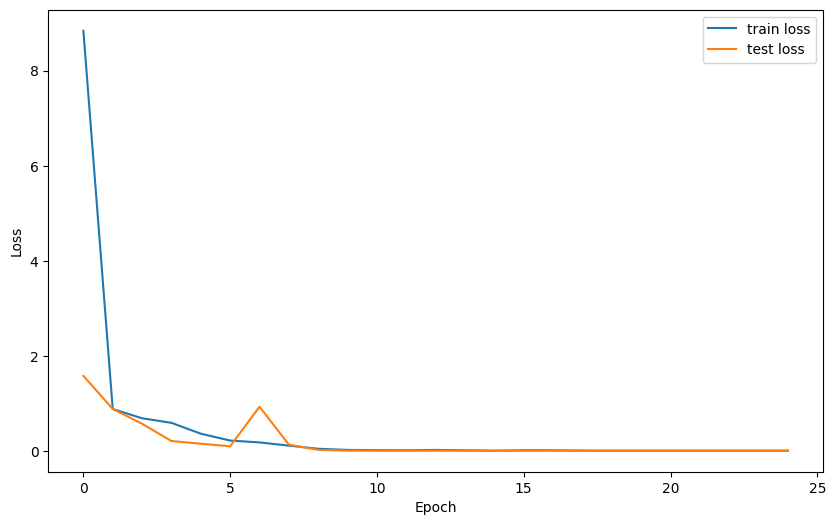

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0040 - mse: 0.0040 
Test Loss: [0.004016256891191006, 0.004016256891191006]


In [14]:
# 1. 데이터 전처리
X2 = df.drop(['Outcome', 'BMI'], axis=1)
y2 = df["BMI"]

# 2. One-hot Encoding
X2 = X2.values
Y2 = pd.get_dummies(y2).values

# 3. 데이터 분할 (훈련 80%, 테스트 20%)
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, Y2, test_size=0.2, random_state=42)
print("data SHAPE :")
print(X_train2.shape, y_train2.shape)
print(X_test2.shape, y_test2.shape)

# 4. Defining the model
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD,Adam

model = Sequential()
model.add(Dense(64,input_shape=(6,),activation='relu'))
model.add(Dense(16,activation='relu'))
model.add(Dense(8,activation='relu'))
model.add(Dense(1))
model.compile(optimizer = 'rmsprop', loss = 'mse', metrics = ['mse'])
model.summary()

# 5. Fitting
N_EPOCHS = 25
history=model.fit(x=X_train2, y=y_train2, epochs=N_EPOCHS, batch_size=32,validation_data= (X_test2,y_test2))
y_pred2 = model.predict(X_test2)

# 6. Training and validation Loss
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.plot(range(N_EPOCHS), history.history['loss'], label='train loss')
plt.plot(range(N_EPOCHS), history.history['val_loss'], label='test loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

loss = model.evaluate(X_test2, y_test2)
print(f"Test Loss: {loss}")